## Project Milestone 3

Executing the naive approach and plotting the runtime.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
#Import data from csv files
df1 = pd.read_csv('favorite-tweets.csv')
df1 = df1.dropna()
df1['Text'] = df1['Text'].astype('str')


tweets = []
for i in df1['Text']:
    tweets.append(i)


df2 = pd.read_csv('Acronyms.csv')
df2 = df2.dropna()
df2['Acronym'] = df2['Acronym'].astype('str')
df2['Meaning'] = df2['Meaning'].astype('str')


acronyms = []
meaning = []
acron = []


acronyms.append(df2['Acronym'])
meaning.append(df2['Meaning'])
# print(tweets)
# print(acronyms)
# print(meaning)


counter = 0
for i in acronyms:
    acron.append([i, meaning[counter]])
    counter = counter + 1

for index in range(len(tweets)):
    tweets[index] = tweets[index].split()
# print(len(tweets)+1)

In [6]:
# Naive Approach Algorithm
# loop for replacement of the acronyms

# for troubleshooting
# print(tweets)
# print(tweets[0][5])
# print(tweets[0])

# these arrays will store the times taken and the and multiplier (ie 1/32th 1/31th ... size to the original of the acronym and tweet amounts)
times = []
multiplier = []
runs = 11


for index in range(1,runs):
    start = time.time()
    for i in range((len(tweets))*index//(5*runs)):
        
        for j in range(len(acron[0][0])*index//(50*runs)):

            for word in range(0,len(tweets[i])):
      
                if tweets[i][word] == acron[0][0][j]:
                    tweets[i][word] = acron[0][1][j]
    
    finish = time.time()
    # print(finish-start)
    # print(index)
    times.append(finish-start)  
    multiplier.append(index/runs)
             
# for i in range(len(tweets)//2):
#     for j in range(len(acron)//2):
#         if tweets[i] == acron[0][0][j]:
#             tweets[i] = acron[0][1][j]

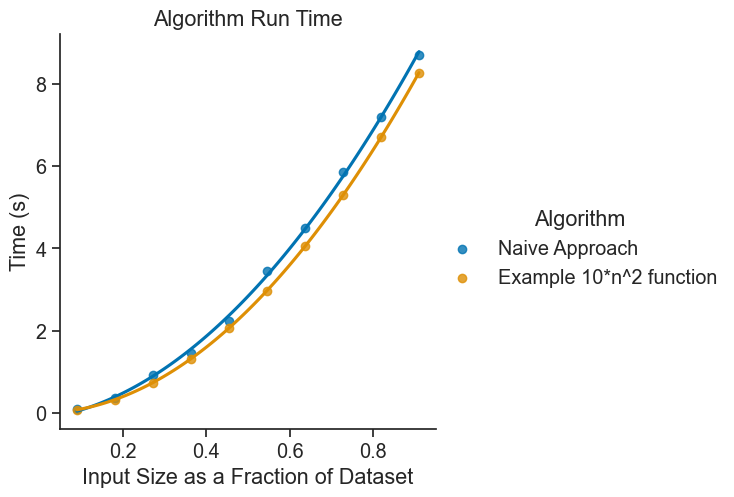

In [7]:
#Plotting our results
data = pd.DataFrame()
data['x'] = multiplier
data['y'] = times
data['Algorithm'] = 'Naive Approach'

exp = pd.DataFrame()
exp['x'] = data['x']
exp['y'] = 10*data['x']**2 #this is the line idk how to make this m*n but that's what im trying to do lol
exp['Algorithm'] = 'Example 10*n^2 function'

results = pd.merge(data,exp, how = 'outer')
sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )
sns.lmplot(x='x',y='y', data=results, ci=None, hue='Algorithm', palette='colorblind', order=2, truncate=True).set(title='Algorithm Run Time',xlabel='Input Size as a Fraction of Dataset',ylabel='Time (s)')